# ROC, 다중변수

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve, average_precision_score


%config InlineBackend.figure_format = 'retina'


In [2]:
def conf_matrix(y_test, y_pred):
  print(confusion_matrix(y_test, y_pred))
  print(classification_report(y_test, y_pred))

def draw_roc(y_test, score):
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  fpr, tpr, _ = roc_curve(y_test, score)
  roc_auc = roc_auc_score(y_test, score)
  plt.figure(figsize=(6,6))
  plt.plot(fpr, tpr, label='AUC = %0.4f)' % roc_auc)
  plt.plot([0, 1], [0, 1], linestyle='--')
  plt.xlim([0.0, 1.05])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC')
  plt.legend(loc="lower right")
def draw_pr(y_test, score):
  pre = dict()
  rcl = dict()
  ap = dict()
  pre, rcl, _ = precision_recall_curve(y_test, score)
  ap = average_precision_score(y_test, score)
  plt.figure(figsize=(6,6))
  plt.plot(rcl, pre, label='AP = %0.4f)' % ap)
  plt.xlim([0.0, 1.05])
  plt.ylim([0.0, 1.05])
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.legend(loc="lower right")

- ROC for positive [1]

[[3 2]
 [1 4]]
              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.67      0.80      0.73         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10



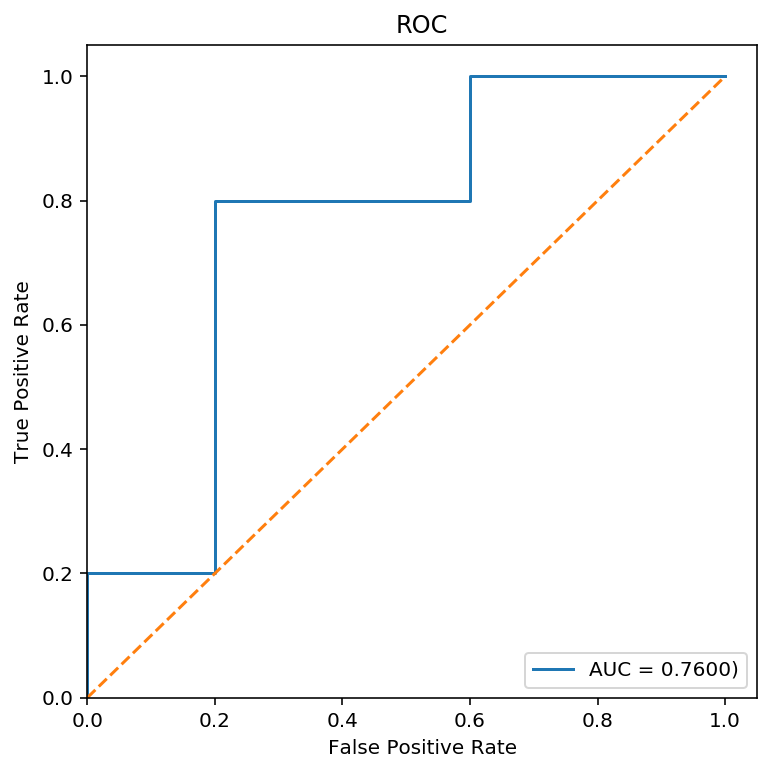

In [3]:
import numpy as np
score = np.linspace(1,0,10).round(1)

y_test = [1,0,1,1,1,0,0,1,0,0]

y_pred = [1,1,1,1,1,1,0,0,0,0]
draw_roc(y_test, score)
conf_matrix(y_test, y_pred)

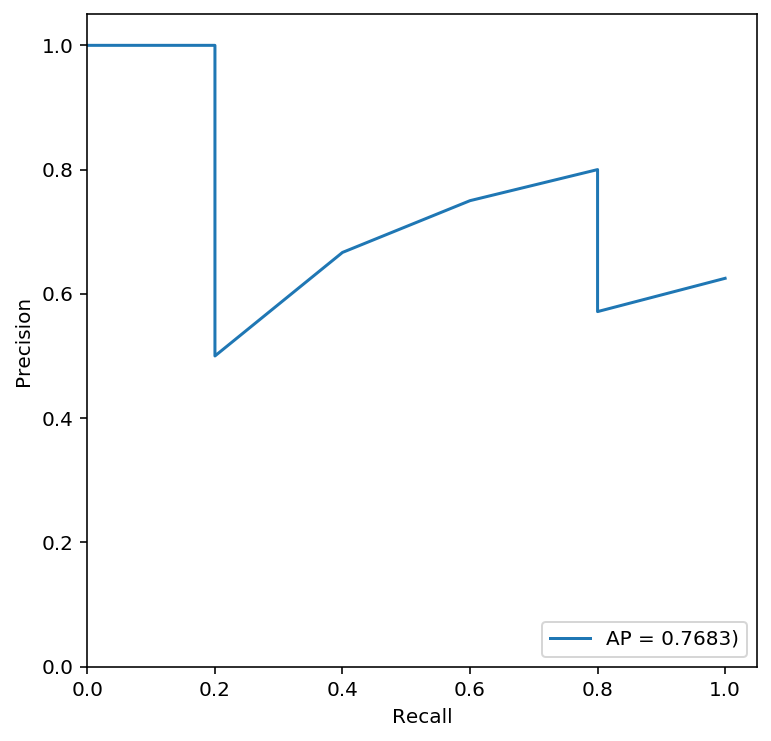

In [4]:
draw_pr(y_test, score)

- ROC for negative [0]

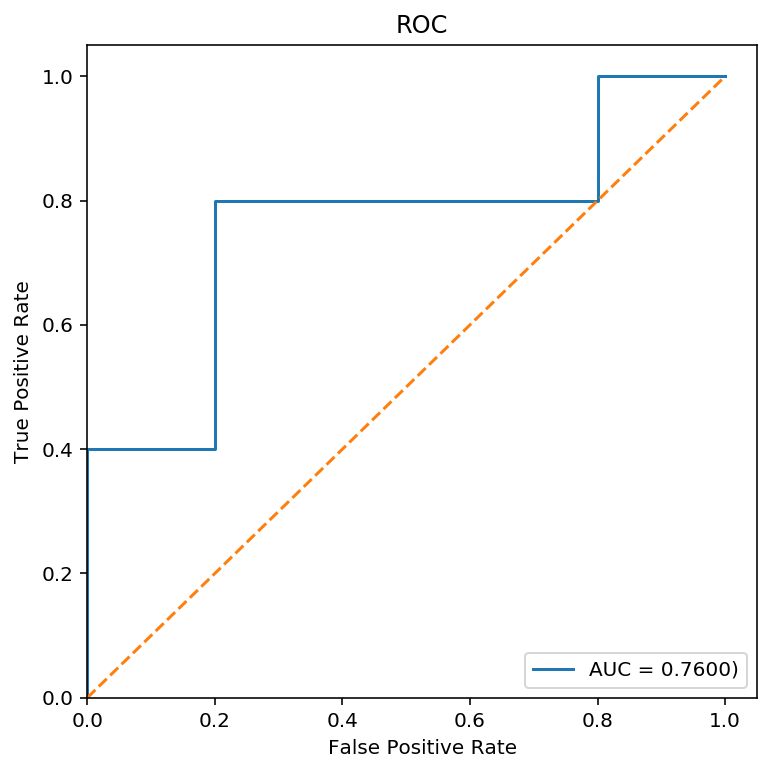

In [5]:
inverse_y_test = [0 if s else 1 for s in y_test]
inverse_score = score[::-1]
# or probability of [0] rather that [1]
draw_roc(inverse_y_test, inverse_score)

- 붓 꽃을 이용한 3가지 분류에서 ROC를 각각 그리는 방법

In [6]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
# Add noisy features to make the problem harder
n_samples, n_features = X.shape

In [9]:
n_samples, n_features

(150, 4)

In [10]:
# X2 = np.c_[X, np.random.randn(n_samples, 200 * n_features)]
noise = np.random.randn(n_samples, n_features)*1.5
X2 = X + noise

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=.5,
                                                    random_state=9)

classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=9))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [18]:
y_score[:20]

array([[ -4.98320394,  -0.99997472,   0.19255764],
       [ -3.54035258,  -0.9999246 ,  -0.59609249],
       [ -4.92406105,  -0.99993624,  -0.29339353],
       [ -3.81613857,  -1.00002775,   0.1641833 ],
       [ -4.94394193,  -1.00010653,   0.5591099 ],
       [  0.72494296,  -0.99988101,  -1.94852771],
       [  8.0670274 ,  -0.99998053,  -3.51615675],
       [  0.41500156,  -0.99999354,  -1.48861807],
       [ -4.61541309,  -1.00003419,   0.21528648],
       [  0.72216627,  -0.99984987,  -1.95696202],
       [  6.18167374,  -0.99996077,  -2.88470367],
       [ -2.74113656,  -1.00001057,  -0.52558977],
       [ -7.12935151,  -1.00009864,   1.18062274],
       [ -6.05034851,  -0.99996625,   0.36716283],
       [ -5.73329592,  -0.99992873,  -0.13902012],
       [-10.5767593 ,  -0.99998172,   1.59128336],
       [ -0.65975823,  -0.9999297 ,  -1.12895283],
       [ -4.21408255,  -1.00003368,  -0.1051812 ],
       [ -7.73573829,  -1.00013589,   1.21226736],
       [ -1.21158007,  -0.99996

In [24]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [25]:
# plt.plot(fpr[0], tpr[0], color='r',
#          label='Setosa (area = %0.2f)' % roc_auc[0])
# plt.plot(fpr[1], tpr[1], color='b',
#          label='Vesicolor (area = %0.2f)' % roc_auc[1])
# plt.plot(fpr[2], tpr[2], color='k',
#          label='Virginica (area = %0.2f)' % roc_auc[2])
# plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic example')
# plt.legend(loc="lower right")

# plt.show()

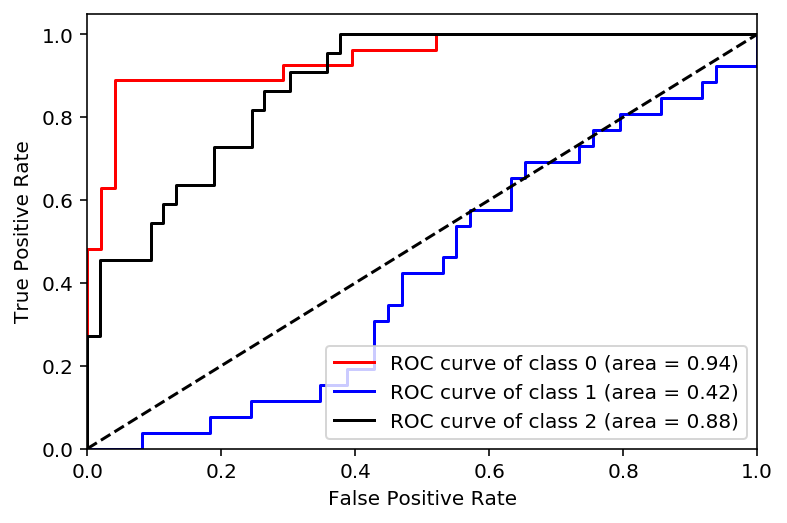

In [26]:
colors = cycle(['r', 'b', 'k'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()